In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob
import os

path = '/content/drive/MyDrive/senior_thesis/judgebench/final_outputs'

dfs = {}
for filename in os.listdir(path):
  if filename.endswith('.csv'):
    file_path = os.path.join(path, filename)

    df = pd.read_csv(file_path)
    print(df)
    filename = filename[:-4]
    # df['id'] = df['id'].astype(int)
    df['correct'] = df['correct'].astype(str).str.strip()
    df['correct'] = df['correct'].str.replace('True', '1')
    df['correct'] = df['correct'].str.replace('False', '0')
    df['correct'] = df['correct'].astype(int)
    dfs[filename] = df.copy()

                                       id           source  \
0    b5ce1305-50fe-5a5e-b785-325ab15c6d2b  mmlu-pro-health   
1    8e1df938-fb37-5c27-8a0d-aedee854251a  mmlu-pro-health   
2    cba66923-b65f-566a-a766-03039fe2345c  mmlu-pro-health   
3    40a0f1d8-fbfe-53e3-947f-3ead7276284e  mmlu-pro-health   
4    bdad5388-27d0-5001-a4ba-cb2208edf775  mmlu-pro-health   
..                                    ...              ...   
264  517dbc08-de63-54f0-bc18-07f1e2347c09    livecodebench   
265  ca59552b-524e-51e0-9eb1-2afdf2915ac2    livecodebench   
266  5ab8d9e6-93cc-585e-b094-abbe3a82ff0f    livecodebench   
267  2092f9af-bcef-594c-9394-b26f14dcb911    livecodebench   
268  f5c923f4-09d1-537e-81c8-d7642d66c633    livecodebench   

                                              question  \
0    In the brain stem, pathways for:\n(A) discrimi...   
1    The best available evidence for an association...   
2    What is the most common way for a virus to kil...   
3    A 19-year-old woma

In [4]:
dfs.keys()

dict_keys(['flant5-small', 'gemma-1.1-2b-it', 'gemma-2-2b-it', 'llama-3.2-1b-it', 'mistral-8B-it-2410', 'flant5-xl', 'flant5-base', 'llama-3-8b-it', 'flant5-large', 'qwen-2.5-7b-it-1m', 'mistral-nemo-it-2407', 'flan-t5-small_new', 'flan-t5-small', 'llama-3.2-3b-it', 'olmo-7b-it', 'olmoe-1b-7b-0924-it', 'qwen-2.5-0.5b-it', 'qwen-2.5-3b-it', 'qwen-2.5-1.5b-it', 'qwen-2.5-7b-it', 'phi-3-medium-4k-it', 'phi-3-mini-4k-it', 'phi-3.5-mini-it', 'phi-4-mini-it', 'mistral-7B-it-v0.1', 'mistral-7B-it-v0.3', 'llama-3.1-8b-it'])

In [5]:
dfs['phi-3.5-mini-it']

,id,source,question,response_A,response_B,correct
0,b5ce1305-50fe-5a5e-b785-325ab15c6d2b,mmlu-pro-health,"In the brain stem, pathways for:\n(A) discrimi...",Let's break this down step by step:\n\n1. The ...,Let's think through this step-by-step:\n\n1) T...,0
1,8e1df938-fb37-5c27-8a0d-aedee854251a,mmlu-pro-health,The best available evidence for an association...,Let's think through this step-by-step:\n\n1. D...,Let's think through this step-by-step:\n\n1) D...,1
2,cba66923-b65f-566a-a766-03039fe2345c,mmlu-pro-health,What is the most common way for a virus to kil...,Let's think through this step-by-step:\n\n1) V...,Let's approach this step-by-step:\n\n1) Viruse...,1
3,40a0f1d8-fbfe-53e3-947f-3ead7276284e,mmlu-pro-health,A 19-year-old woman comes to the emergency dep...,Let's approach this step-by-step:\n\n1. The pa...,Let's analyze this scenario step-by-step:\n\n1...,0
4,bdad5388-27d0-5001-a4ba-cb2208edf775,mmlu-pro-health,Which of the following best explains the antio...,Let's analyze each option:\n\n1) Vitamin E is ...,Let's analyze each option and think through th...,0
...,...,...,...,...,...,...
265,517dbc08-de63-54f0-bc18-07f1e2347c09,livecodebench,A supermarket sells egg packs.\nA pack of 6 eg...,"# YOUR CODE HERE\ndef min_cost(N, S, M, L):\n ...","# YOUR CODE HERE\ndef min_cost(N, S, M, L):\n ...",1
266,ca59552b-524e-51e0-9eb1-2afdf2915ac2,livecodebench,"You are given a sequence A=(A_1,\ldots,A_N) of...",# YOUR CODE HERE\nN = int(input())\nA = list(m...,# YOUR CODE HERE\nN = int(input())\nA = list(m...,0
267,5ab8d9e6-93cc-585e-b094-abbe3a82ff0f,livecodebench,AtCoder Inc. sells T-shirts with its logo.\nYo...,"# YOUR CODE HERE\nN, M = map(int, input().spli...","# YOUR CODE HERE\nN, M = map(int, input().spli...",0
268,2092f9af-bcef-594c-9394-b26f14dcb911,livecodebench,"You are given two grids, A and B, each with H ...",# YOUR CODE HERE\nfrom itertools import permut...,# YOUR CODE HERE\nfrom itertools import permut...,0


In [6]:
ground_truth = pd.read_csv('/content/drive/MyDrive/senior_thesis/judgebench/judgebench_ground_truth.csv')
ground_truth.head()

,Unnamed: 0,id,original_id,source,question,response_model,response_A,response_B,label
0,0,b5ce1305-50fe-5a5e-b785-325ab15c6d2b,6603.0,mmlu-pro-health,"In the brain stem, pathways for:\n(A) discrimi...",claude-3-5-sonnet-20240620,Let's break this down step by step:\n\n1. The ...,Let's think through this step-by-step:\n\n1) T...,A
1,1,8e1df938-fb37-5c27-8a0d-aedee854251a,6275.0,mmlu-pro-health,The best available evidence for an association...,claude-3-5-sonnet-20240620,Let's think through this step-by-step:\n\n1. D...,Let's think through this step-by-step:\n\n1) D...,B
2,2,cba66923-b65f-566a-a766-03039fe2345c,6643.0,mmlu-pro-health,What is the most common way for a virus to kil...,claude-3-5-sonnet-20240620,Let's think through this step-by-step:\n\n1) V...,Let's approach this step-by-step:\n\n1) Viruse...,B
3,3,40a0f1d8-fbfe-53e3-947f-3ead7276284e,6446.0,mmlu-pro-health,A 19-year-old woman comes to the emergency dep...,claude-3-5-sonnet-20240620,Let's approach this step-by-step:\n\n1. The pa...,Let's analyze this scenario step-by-step:\n\n1...,A
4,4,bdad5388-27d0-5001-a4ba-cb2208edf775,6573.0,mmlu-pro-health,Which of the following best explains the antio...,claude-3-5-sonnet-20240620,Let's analyze each option:\n\n1) Vitamin E is ...,Let's analyze each option and think through th...,A


In [7]:
result = ground_truth.copy()

for i, df in dfs.items():
    df_renamed = df.rename(columns={'correct': f'{i}'})

    df_renamed = df_renamed[['id', f'{i}']]

    result = result.merge(df_renamed, on='id', how='inner')


In [8]:
result

,Unnamed: 0,id,original_id,source,question,response_model,response_A,response_B,label,flant5-small,...,qwen-2.5-3b-it,qwen-2.5-1.5b-it,qwen-2.5-7b-it,phi-3-medium-4k-it,phi-3-mini-4k-it,phi-3.5-mini-it,phi-4-mini-it,mistral-7B-it-v0.1,mistral-7B-it-v0.3,llama-3.1-8b-it
0,1,8e1df938-fb37-5c27-8a0d-aedee854251a,6275.0,mmlu-pro-health,The best available evidence for an association...,claude-3-5-sonnet-20240620,Let's think through this step-by-step:\n\n1. D...,Let's think through this step-by-step:\n\n1) D...,B,0,...,0,1,1,1,1,1,0,0,0,1
1,5,c0b98b73-d73d-5bfd-a34f-59d68457e992,6274.0,mmlu-pro-health,The best available evidence for an association...,claude-3-5-sonnet-20240620,Let's think through this step-by-step:\n\n1. D...,Let's think through this step-by-step:\n\n1. D...,B,0,...,1,1,1,1,1,1,0,0,1,0
2,6,b0446013-eece-5acc-bbfa-9145f5a61ed1,6079.0,mmlu-pro-health,The World Systems Theory divides the world as ...,claude-3-5-sonnet-20240620,Let's think through this step-by-step:\n\n1. S...,Let's think through this step-by-step:\n\n1. S...,A,1,...,1,0,0,0,1,0,1,1,1,1
3,7,575b2175-e75b-5f1a-ba75-8fa7a1e44f90,6311.0,mmlu-pro-health,A couple comes for preconceptional genetic cou...,claude-3-5-sonnet-20240620,"Let's approach this step-by-step:\n\n1) First,...","Let's approach this step-by-step:\n\n1) First,...",B,0,...,1,0,1,1,1,1,1,0,0,0
4,8,c42511bf-0b43-5395-8a2b-f8748c6afdbf,6742.0,mmlu-pro-health,Laryngoscopic examination of the vocal folds a...,claude-3-5-sonnet-20240620,Let's think through this step-by-step:\n\n1. T...,Let's think through this step-by-step:\n\n1. T...,A,1,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,260,12888fdc-45bf-556f-a19e-a7839ecd89b5,NaN,livecodebench,The programming contest World Tour Finals is u...,claude-3-5-sonnet-20240620,"# YOUR CODE HERE\nN, M = map(int, input().spli...","# YOUR CODE HERE\nN, M = map(int, input().spli...",A,1,...,0,1,1,0,0,0,1,1,1,1
69,264,a28a8dae-78a7-51a7-a46f-84a6e502068d,NaN,livecodebench,You are given a weighted simple connected undi...,claude-3-5-sonnet-20240620,# YOUR CODE HERE\nimport sys\nfrom itertools i...,# YOUR CODE HERE\nimport sys\nfrom itertools i...,B,0,...,1,0,0,0,1,1,0,0,0,0
70,265,517dbc08-de63-54f0-bc18-07f1e2347c09,NaN,livecodebench,A supermarket sells egg packs.\nA pack of 6 eg...,claude-3-5-sonnet-20240620,"# YOUR CODE HERE\ndef min_cost(N, S, M, L):\n ...","# YOUR CODE HERE\ndef min_cost(N, S, M, L):\n ...",A,1,...,0,1,1,1,1,1,1,1,1,1
71,266,ca59552b-524e-51e0-9eb1-2afdf2915ac2,NaN,livecodebench,"You are given a sequence A=(A_1,\ldots,A_N) of...",claude-3-5-sonnet-20240620,# YOUR CODE HERE\nN = int(input())\nA = list(m...,# YOUR CODE HERE\nN = int(input())\nA = list(m...,B,0,...,1,0,1,1,1,0,1,0,0,1


In [9]:
formatted_data = result.copy()
formatted_data = formatted_data.drop(columns=['id','original_id', 'response_model', 'source','question','response_A', 'response_B', 'label'])
formatted_data.head()

,Unnamed: 0,flant5-small,gemma-1.1-2b-it,gemma-2-2b-it,llama-3.2-1b-it,mistral-8B-it-2410,flant5-xl,flant5-base,llama-3-8b-it,flant5-large,...,qwen-2.5-3b-it,qwen-2.5-1.5b-it,qwen-2.5-7b-it,phi-3-medium-4k-it,phi-3-mini-4k-it,phi-3.5-mini-it,phi-4-mini-it,mistral-7B-it-v0.1,mistral-7B-it-v0.3,llama-3.1-8b-it
0,1,0,0,0,0,0,1,0,0,1,...,0,1,1,1,1,1,0,0,0,1
1,5,0,1,0,0,0,1,0,0,1,...,1,1,1,1,1,1,0,0,1,0
2,6,1,1,1,1,1,0,1,1,0,...,1,0,0,0,1,0,1,1,1,1
3,7,0,0,0,0,0,1,0,0,1,...,1,0,1,1,1,1,1,0,0,0
4,8,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0


In [10]:
formatted_data.columns

Index(['Unnamed: 0', 'flant5-small', 'gemma-1.1-2b-it', 'gemma-2-2b-it',
       'llama-3.2-1b-it', 'mistral-8B-it-2410', 'flant5-xl', 'flant5-base',
       'llama-3-8b-it', 'flant5-large', 'qwen-2.5-7b-it-1m',
       'mistral-nemo-it-2407', 'flan-t5-small_new', 'flan-t5-small',
       'llama-3.2-3b-it', 'olmo-7b-it', 'olmoe-1b-7b-0924-it',
       'qwen-2.5-0.5b-it', 'qwen-2.5-3b-it', 'qwen-2.5-1.5b-it',
       'qwen-2.5-7b-it', 'phi-3-medium-4k-it', 'phi-3-mini-4k-it',
       'phi-3.5-mini-it', 'phi-4-mini-it', 'mistral-7B-it-v0.1',
       'mistral-7B-it-v0.3', 'llama-3.1-8b-it'],
      dtype='object')

In [11]:
result.to_csv('judgebench_results.csv')

In [12]:
result['phi-4-mini-it'].sum()

np.int64(45)

Model Accuracies (%):
                   Model       Accuracy
0           Unnamed: 0.1    3600.000000
1          flan-t5-small      57.534247
2      flan-t5-small_new      57.534247
3            flant5-base      57.534247
4           flant5-large      42.465753
5           flant5-small      57.534247
6              flant5-xl      41.095890
7        gemma-1.1-2b-it      61.643836
8          gemma-2-2b-it      56.164384
9          llama-3-8b-it      52.054795
10       llama-3.1-8b-it      53.424658
11       llama-3.2-1b-it      53.424658
12       llama-3.2-3b-it      41.095890
13    mistral-7B-it-v0.1      57.534247
14    mistral-7B-it-v0.3      56.164384
15    mistral-8B-it-2410      56.164384
16  mistral-nemo-it-2407      54.794521
17            olmo-7b-it      45.205479
18   olmoe-1b-7b-0924-it      58.904110
19           original_id  655589.130435
20    phi-3-medium-4k-it      52.054795
21      phi-3-mini-4k-it      63.013699
22       phi-3.5-mini-it      58.904110
23         phi-4-m

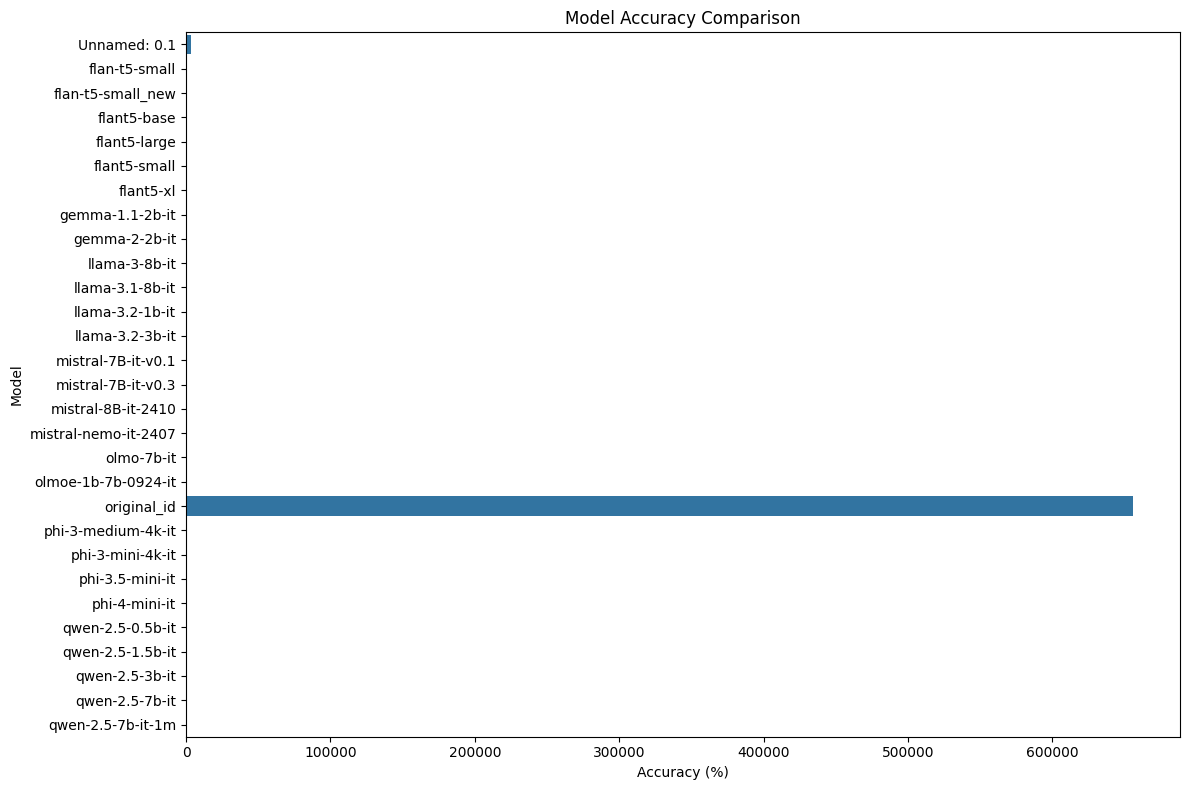


Total number of examples: 73

Best performing model: Unnamed: 0.1 with accuracy 3600.00%
Worst performing model: qwen-2.5-7b-it-1m with accuracy 52.05%


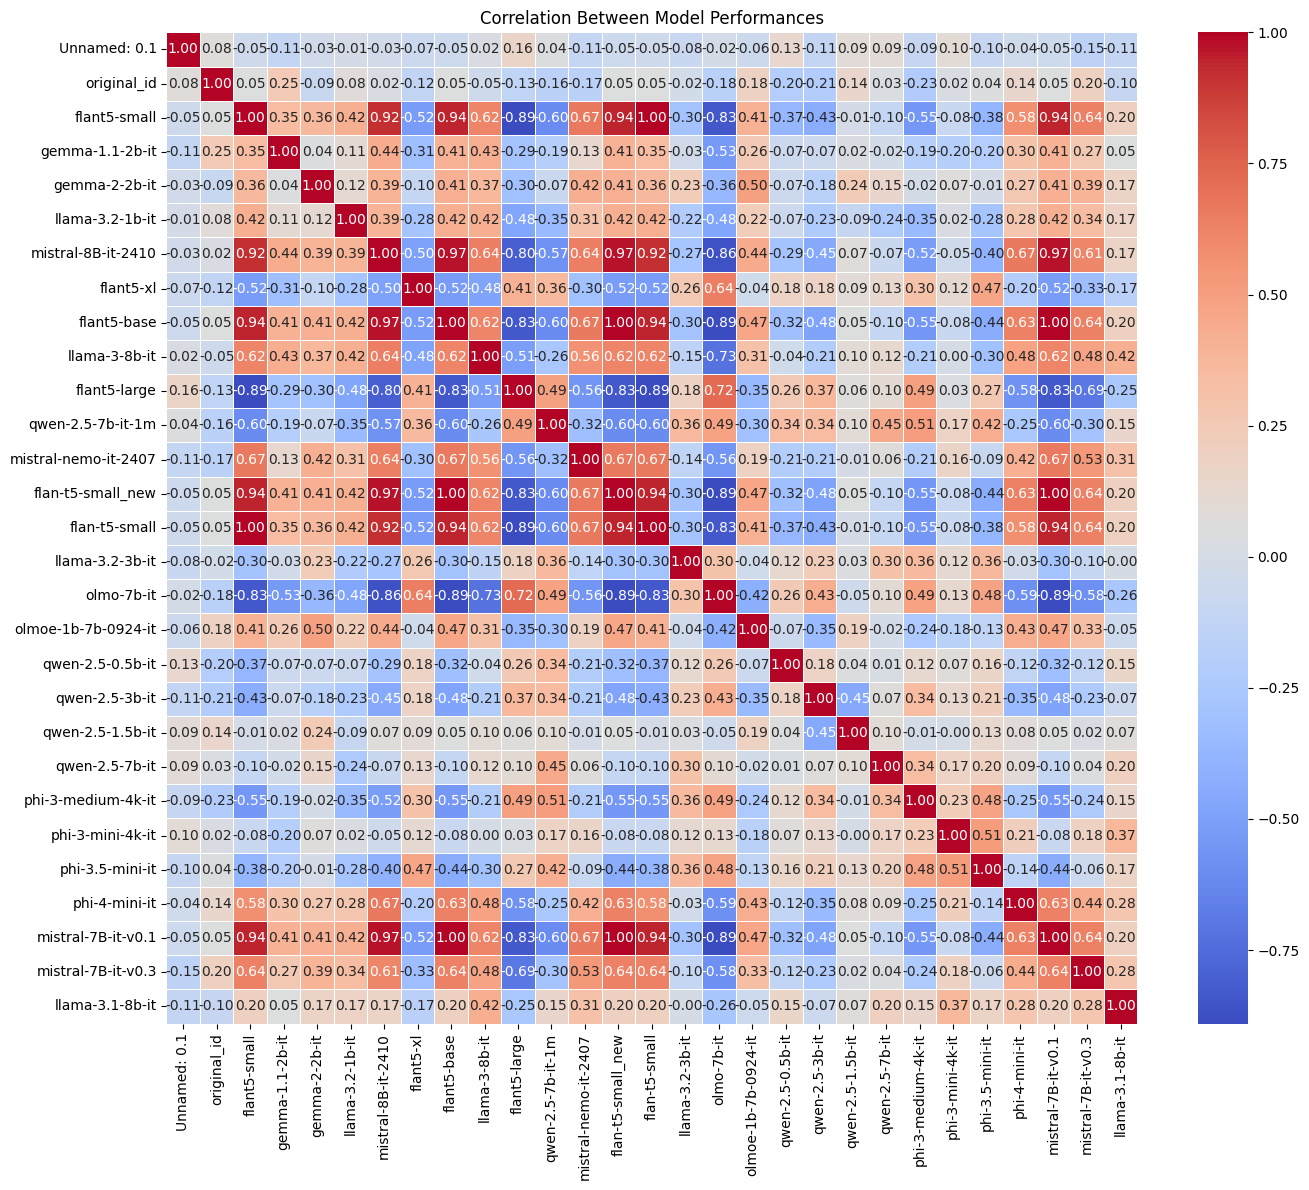

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('judgebench_results.csv')

# List of model columns (excluding non-model columns)
model_columns = [col for col in df.columns if col not in ['source','response_model','Unnamed: 0', 'id', 'question', 'response_A', 'response_B', 'label']]

# Calculate accuracy for each model
accuracies = {}
for model in model_columns:
    # Calculate accuracy (assuming 1 is correct and 0 is incorrect)
    accuracy = df[model].mean() * 100  # Convert to percentage
    accuracies[model] = accuracy

# Create a dataframe with the accuracies
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values('Model', ascending=True).reset_index(drop=True)

# Display the accuracies
print("Model Accuracies (%):")
# accuracy_df.sort_values(by='Model')
print(accuracy_df)
accuracy_df.to_csv('judgebench_model_accuracies.csv')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('model_accuracies.png')
plt.show()

# Calculate additional statistics
total_examples = len(df)
print(f"\nTotal number of examples: {total_examples}")

# Get the best and worst performing models
best_model = accuracy_df.iloc[0]
worst_model = accuracy_df.iloc[-1]

print(f"\nBest performing model: {best_model['Model']} with accuracy {best_model['Accuracy']:.2f}%")
print(f"Worst performing model: {worst_model['Model']} with accuracy {worst_model['Accuracy']:.2f}%")

# Calculate correlation between model performances
correlation_matrix = df[model_columns].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Model Performances')
plt.tight_layout()
plt.savefig('model_correlations.png')
plt.show()


In [14]:
model_names = formatted_data.columns.tolist()
formatted_data = formatted_data.to_numpy()

results = {}
for model_name in model_names:
    results[model_name] = {"subject_id": model_name, "responses": {}}

for i in range(formatted_data.shape[0]):
    question_id = f"q{i+1}"

    for j, model_name in enumerate(model_names):
        results[model_name]["responses"][question_id] = int(formatted_data[i, j])

jsonl_output = "\n".join([json.dumps(results[model]) for model in model_names])

with open("formatted_data.jsonl", "w") as f:
    f.write(jsonl_output)

## final try of irt

In [15]:
!pip uninstall py-irt

In [16]:
!pip install pandas pyro-ppl py-irt --U


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --U


In [17]:
!py-irt train 1pl formatted_data.jsonl output/output_1pl --epochs 1000 --priors vague

/bin/bash: line 1: py-irt: command not found


In [18]:
with open ("output/output_1pl/best_parameters.json","r") as file:
    results = json.load(file)
results.keys()

FileNotFoundError: [Errno 2] No such file or directory: 'output/output_1pl/best_parameters.json'

In [ ]:
len(results["diff"])

In [ ]:
results['subject_ids']

In [ ]:
items = pd.DataFrame(
    index=results["item_ids"],
    data= results["diff"],
    columns=["diff"]
)
items.head()

In [ ]:

df = pd.DataFrame.from_dict(results['subject_ids'], orient="index", columns=["models"])
df.index = df.index.astype(int)

df.head()

In [ ]:
subjects = pd.DataFrame(
    index=results["subject_ids"],
    data= results["ability"],
    columns=["ability_1pl"]
)
subjects.set_index(df.index, inplace=True)
subjects = pd.merge(subjects, df, left_index = True, right_index = True)
subjects.head()

In [ ]:
subjects

## Comparing to benchmarks?

In [ ]:
#df for abilities from output
thetas = pd.DataFrame({"Model": subjects['models'], "Theta": subjects['ability_1pl']})
thetas



In [ ]:
benchmarks = pd.read_csv("https://docs.google.com/spreadsheets/d/131-OAwowy3LQ0X0xxArzTuJXCI6rzLeXx6dclbclQUA/export?format=csv")
benchmarks



In [ ]:
stats = pd.merge(benchmarks, thetas, on='Model')
stats

In [ ]:
stats.to_csv('thetas_judgebench.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
stats_minmax = stats.copy()
stats_minmax[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]] = scaler_minmax.fit_transform(stats[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]])

# # should z score instead maybe??? Idk girl
# scaler_std = StandardScaler()
# stats_std = stats.copy()
# stats_std[["IFEval", "Big Bench Hard", "MuSR", "Theta"]] = scaler_std.fit_transform(stats[["IFEval", "Big Bench Hard", "MuSR", "Theta"]])

print(stats_minmax.head())
# print(stats_std.head())


In [ ]:
def get_theta_info(stats):

  from scipy.stats import spearmanr

  correlations = {col: spearmanr(stats["Theta"], stats[col])[0] for col in ["IFEval", "Big_Bench_Hard", "MuSR"]}
  print("Spearman Correlations with Theta:", correlations)

    #explained variance
  from sklearn.linear_model import LinearRegression
  X = stats[["IFEval", "Big_Bench_Hard", "MuSR"]]
  y = stats["Theta"]
  reg = LinearRegression().fit(X, y)
  r_squared = reg.score(X, y)
  print("R² of Theta predicting benchmarks:", r_squared)

In [ ]:
get_theta_info(stats_minmax)

In [ ]:
get_theta_info(stats)

In [ ]:
!py-irt train 2pl formatted_data.jsonl output/output_2pl

In [ ]:
with open ("output/output_2pl/best_parameters.json","r") as file:
    results_2 = json.load(file)
results_2.keys()

In [ ]:
items_2 = pd.DataFrame(
    index=results_2["item_ids"],
    data= results_2["diff"],
    columns=["diff"]
)
items_2['disc'] = results_2['disc']
items_2.head()

In [ ]:
result = result.reset_index(drop=True)
items_2 = items_2.reset_index(drop=True)


if len(result) == len(items_2):
    items_2['id'] = result['id'].values
items_2

In [ ]:
items_2.to_csv('judgebench_items.csv')

In [ ]:

df_2 = pd.DataFrame.from_dict(results_2['subject_ids'], orient="index", columns=["models"])
df_2.index = df_2.index.astype(int)

df_2.head()

In [ ]:
subjects_2 = pd.DataFrame(
    index=results_2["subject_ids"],
    data= results_2["ability"],
    columns=["ability_2pl"]
)
subjects_2.set_index(df_2.index, inplace=True)
subjects_2 = pd.merge(subjects_2, df_2, left_index = True, right_index = True)
subjects_2.head()

In [ ]:
#df for abilities from output
thetas_2 = pd.DataFrame({"Model": subjects_2['models'], "Theta": subjects_2['ability_2pl']})
thetas_2



In [ ]:
stats_2 = pd.merge(benchmarks, thetas_2, on='Model')
stats_2

In [ ]:
get_theta_info(stats_2)

In [ ]:
final = stats.merge(thetas_2, on='Model')
final

In [ ]:
final.to_csv('judgebench_thetas.csv')